# Electric Vehicle Competitive Landscape Analysis: EDA

The purpose of this notebook is to explore the EV Ranking Dataset in order to answer the two questions we posed in our previous notebook:

1. Who is best positioned to continue growing their sales over the coming decade?
2. Who is worst positioned to continue growing their sales over the coming decade?

To accomplish this, we will first breakdown consumers into the following segments:

- Those who are most sensitive to price.
- Those who are not sensitive to price, and care most about range.
- Those who are not sensitive to price, and care most about performance.
- Those who are sensitive to value, and want the best value for money on range.
- Those who are sensitive to value, and want the best value for money on performance.
- Those who are sensitive to value, and want the best value for money overall.

For each segment, we will then provide the best option for the consumer. 

At the end, we will also group consumers into different categories based on their budget and provide recommendations for which EV model provides the best value for each of the following budgets:

- Less than \\$30k.
- Between \\$30k-\\$40k.
- Between \\$40k-\\$50k.
- Between \\$50k-\\$60k.
- Between \\$60k-\\$80k.
- Between \\$80k-\\$100k.
- Over \\$100k.

Once we are done, we should have a much better picture with respect to which of the top 5 best-selling EV brands in Washington State are best positioned and worst positioned to compete in the future.

---

## Load Modules & Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ev_data = pd.read_csv('EV_Rankings_w_Tax_Credit.csv')
ev_data

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
0,Tesla,Model 3 Base,Sedan,"$38,990",$0,"$38,990",272,5.8,6.98,2.26,4.71
1,Tesla,Model 3 Long Range,Sedan,"$47,740",$0,"$47,740",341,4.2,7.14,2.01,5.14
2,Tesla,Model 3 Performance,Sedan,"$53,990","$7,500","$46,490",296,2.9,6.37,1.35,5.02
3,Tesla,Model Y RWD,Crossover SUV,"$44,990","$7,500","$37,490",320,6.5,8.54,2.44,6.10
4,Tesla,Model Y AWD,Crossover SUV,"$47,990","$7,500","$40,490",310,4.8,7.66,1.94,5.71
5,Tesla,Model Y Performance,Crossover SUV,"$51,490","$7,500","$43,990",279,3.5,6.34,1.54,4.80
6,Tesla,Model S AWD,Luxury Sedan,"$72,990",$0,"$72,990",402,3.1,5.51,2.26,3.24
7,Tesla,Model S Plaid,Luxury Sedan,"$87,990",$0,"$87,990",359,2.0,4.08,1.75,2.33
8,Tesla,Model X AWD,Luxury SUV,"$77,990","$7,500","$70,490",335,3.8,4.75,2.68,2.07
9,Tesla,Model X Plaid,Luxury SUV,"$92,990",$0,"$92,990",326,2.5,3.51,2.32,1.18


---

## Exploratory Data Analysis

We will begin by first getting a sense of how many individial EV models each car brand is bringing to the table:

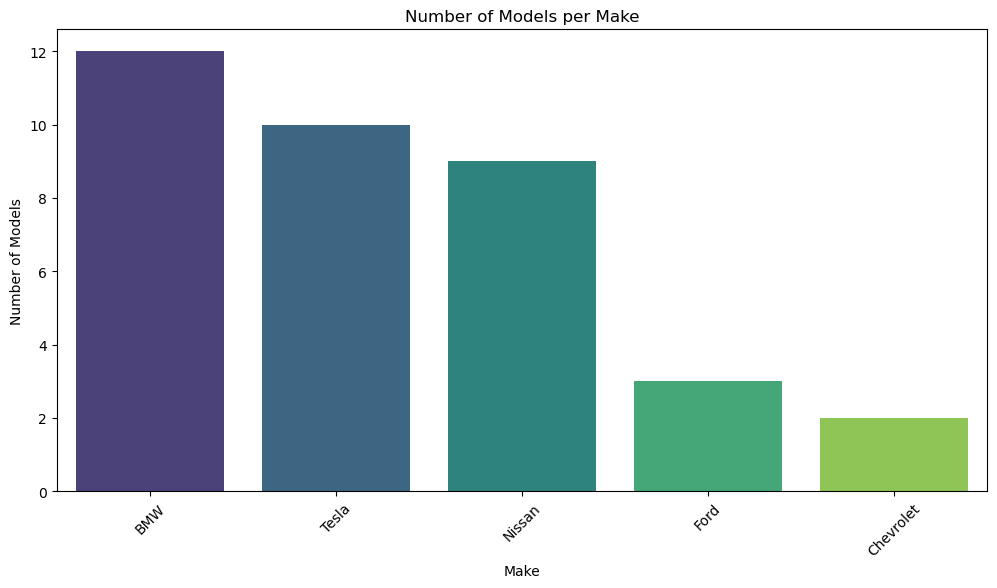

In [3]:
# Count the number of models per make
make_counts = ev_data['Make'].value_counts().reset_index()
make_counts.columns = ['Make', 'Count']  # Rename columns for clarity

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=make_counts, x='Make', y='Count', palette='viridis')
plt.xlabel('Make')
plt.ylabel('Number of Models')
plt.title('Number of Models per Make')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

It looks like BMW has the most to offer, while Chevrolet has the least. 

Let's now explore our different segments:

### Those Who are Most Sensitive to Price:

In [4]:
ev_data['Purchase_Price'] = ev_data['Purchase_Price'].replace('[\$,]', '', regex=True).astype(int)

ev_data = ev_data.sort_values('Purchase_Price').reset_index(drop=True)
ev_data.index = ev_data.index + 1

least_expensive = ev_data.head().style.applymap(lambda x: 'background-color: yellow', subset=['Purchase_Price']).format(precision=2)
least_expensive

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
1,Nissan,Leaf S,Hatchback,"$28,140","$3,750",24390,149,7.50,6.11,1.83,4.28
2,Nissan,Leaf SV Plus,Hatchback,"$36,040","$3,750",32290,212,6.70,6.57,2.16,4.40
3,Tesla,Model Y RWD,Crossover SUV,"$44,990","$7,500",37490,320,6.50,8.54,2.44,6.10
4,Chevrolet,Equinox 2LT eAWD,Crossover SUV,"$45,200","$7,500",37700,285,5.90,7.56,2.22,5.34
5,Tesla,Model 3 Base,Sedan,"$38,990",$0,38990,272,5.80,6.98,2.26,4.71


- As we can see from above, the Nissan Leaf S is the most affordable vehicle in our dataset!

In [5]:
ev_data = ev_data.sort_values('Purchase_Price', ascending = False).reset_index(drop=True)
ev_data.index = ev_data.index + 1

most_expensive = ev_data.head().style.applymap(lambda x: 'background-color: yellow', subset=['Purchase_Price']).format(precision=2)
most_expensive

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
1,BMW,i7 M70,Ultra-Luxury Sedan,"$168,500",$0,168500,291,3.50,1.73,5.90,-4.17
2,BMW,i7 eDrive 60,Ultra-Luxury Sedan,"$124,200",$0,124200,317,4.50,2.55,5.59,-3.04
3,BMW,iX M60,Luxury SUV,"$111,500",$0,111500,285,3.60,2.56,4.01,-1.46
4,BMW,i7 eDrive 50,Ultra-Luxury Sedan,"$105,700",$0,105700,321,5.30,3.04,5.60,-2.57
5,Tesla,Model X Plaid,Luxury SUV,"$92,990",$0,92990,326,2.50,3.51,2.32,1.18


- While on the other end of the spectrum, BMW models tend to be the most expensive.

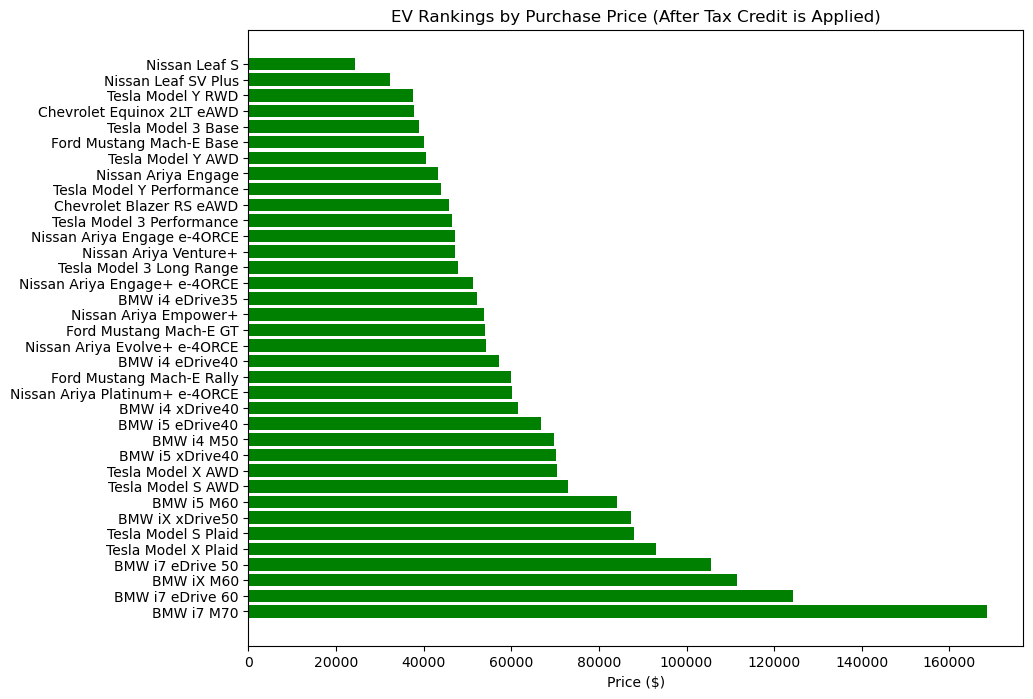

In [6]:
# Plot EV models by price
ev_data_sorted = ev_data.sort_values('Purchase_Price')

labels = ev_data_sorted.apply(lambda row: f"{row['Make']} {row['Model']}", axis=1)

plt.figure(figsize=(10, 8))
bars = plt.barh(labels, ev_data_sorted['Purchase_Price'], color='green')
plt.xlabel('Price ($)')
plt.title('EV Rankings by Purchase Price (After Tax Credit is Applied)')
plt.gca().invert_yaxis() 
plt.show()

### Those Who are Not Sensitive to Price, and Care Most About Range:

In [7]:
ev_data = pd.read_csv('EV_Rankings_w_Tax_Credit.csv') #To reset Purchase Price back to currency format

ev_data = ev_data.sort_values('Range_(mi)', ascending=False).reset_index(drop=True)
ev_data.index = ev_data.index + 1

most_range = ev_data.head().style.applymap(lambda x: 'background-color: yellow', subset=['Range_(mi)']).format(precision=2)
most_range

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
1,Tesla,Model S AWD,Luxury Sedan,"$72,990",$0,"$72,990",402,3.10,5.51,2.26,3.24
2,Tesla,Model S Plaid,Luxury Sedan,"$87,990",$0,"$87,990",359,2.00,4.08,1.75,2.33
3,Tesla,Model 3 Long Range,Sedan,"$47,740",$0,"$47,740",341,4.20,7.14,2.01,5.14
4,Tesla,Model X AWD,Luxury SUV,"$77,990","$7,500","$70,490",335,3.80,4.75,2.68,2.07
5,Tesla,Model X Plaid,Luxury SUV,"$92,990",$0,"$92,990",326,2.50,3.51,2.32,1.18


- The Tesla Model S AWD wins the prize for longest range with 402 miles!

In [8]:
ev_data = ev_data.sort_values('Range_(mi)')

least_range = ev_data.head().style.applymap(lambda x: 'background-color: yellow', subset=['Range_(mi)']).format(precision=2)
least_range

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
36,Nissan,Leaf S,Hatchback,"$28,140","$3,750","$24,390",149,7.50,6.11,1.83,4.28
35,Nissan,Ariya Engage e-4ORCE,Crossover SUV,"$47,190",$0,"$47,190",205,5.10,4.34,2.41,1.94
34,Nissan,Leaf SV Plus,Hatchback,"$36,040","$3,750","$32,290",212,6.70,6.57,2.16,4.40
33,Nissan,Ariya Engage,Crossover SUV,"$43,190",$0,"$43,190",216,7.10,5.00,3.07,1.93
32,Ford,Mustang Mach-E Base,Crossover SUV,"$39,995",$0,"$39,995",250,5.60,6.25,2.24,4.01


- Nissan tends to offer models with the least amount of range.

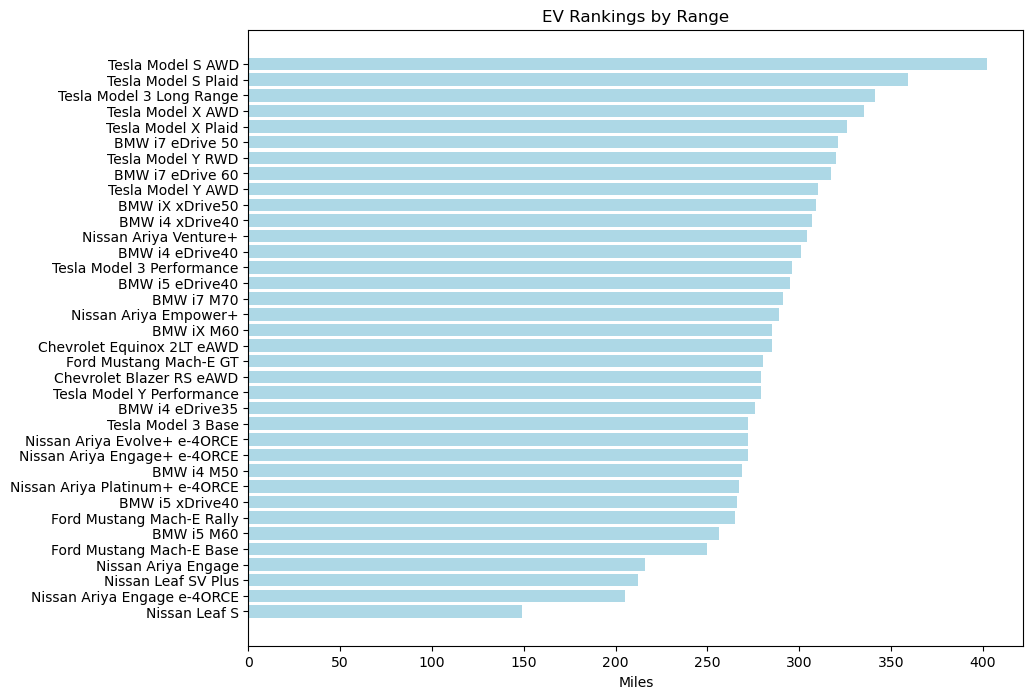

In [9]:
#Plot EV models by range
ev_data_sorted = ev_data.sort_values('Range_(mi)', ascending = False)

labels = ev_data_sorted.apply(lambda row: f"{row['Make']} {row['Model']}", axis=1)

plt.figure(figsize=(10, 8))
plt.barh(labels, ev_data_sorted['Range_(mi)'], color='lightblue')
plt.xlabel('Miles')
plt.title('EV Rankings by Range')
plt.gca().invert_yaxis() 

plt.show()

### Those Who are Sensitive to Value, and Want the Best Value for Money on Range:

In [10]:
ev_data = ev_data.sort_values('Range/Price', ascending=False).reset_index(drop=True)
ev_data.index = ev_data.index + 1

best_value_for_range = ev_data.head().style.applymap(lambda x: 'background-color: yellow', subset=['Range/Price']).format(precision=2)
best_value_for_range

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
1,Tesla,Model Y RWD,Crossover SUV,"$44,990","$7,500","$37,490",320,6.50,8.54,2.44,6.10
2,Tesla,Model Y AWD,Crossover SUV,"$47,990","$7,500","$40,490",310,4.80,7.66,1.94,5.71
3,Chevrolet,Equinox 2LT eAWD,Crossover SUV,"$45,200","$7,500","$37,700",285,5.90,7.56,2.22,5.34
4,Tesla,Model 3 Long Range,Sedan,"$47,740",$0,"$47,740",341,4.20,7.14,2.01,5.14
5,Tesla,Model 3 Base,Sedan,"$38,990",$0,"$38,990",272,5.80,6.98,2.26,4.71


- The Tesla Model Y RWD wins this one, providing 320 miles of range for a $37,490 purchase price.

In [11]:
ev_data = ev_data.sort_values('Range/Price')
ev_data.index = ev_data.index + 1

worst_value_for_range = ev_data.head().style.applymap(lambda x: 'background-color: yellow', subset=['Range/Price']).format(precision=2)
worst_value_for_range

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
37,BMW,i7 M70,Ultra-Luxury Sedan,"$168,500",$0,"$168,500",291,3.50,1.73,5.90,-4.17
36,BMW,i7 eDrive 60,Ultra-Luxury Sedan,"$124,200",$0,"$124,200",317,4.50,2.55,5.59,-3.04
35,BMW,iX M60,Luxury SUV,"$111,500",$0,"$111,500",285,3.60,2.56,4.01,-1.46
34,BMW,i7 eDrive 50,Ultra-Luxury Sedan,"$105,700",$0,"$105,700",321,5.30,3.04,5.60,-2.57
33,BMW,i5 M60,Luxury Sedan,"$84,100",$0,"$84,100",256,3.70,3.04,3.11,-0.07


- BMW tends to offer the worst value for range in the dataset.

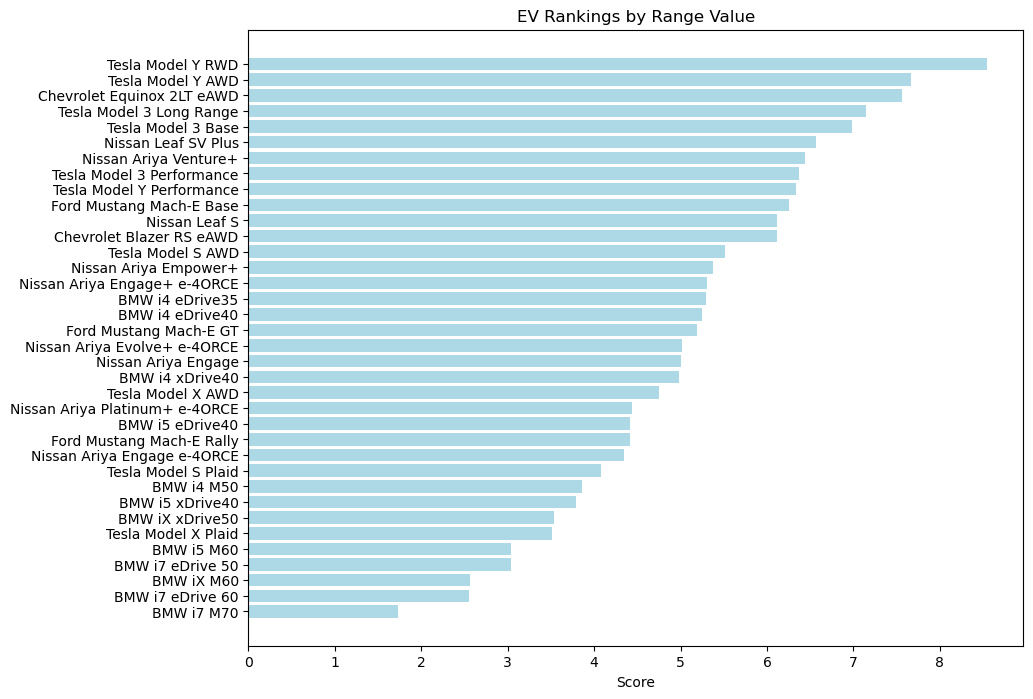

In [12]:
#Plot EV models by Range/Price Score
ev_data_sorted = ev_data.sort_values('Range/Price', ascending = False)

labels = ev_data_sorted.apply(lambda row: f"{row['Make']} {row['Model']}", axis=1)

plt.figure(figsize=(10, 8))
plt.barh(labels, ev_data_sorted['Range/Price'], color='lightblue')
plt.xlabel('Score')
plt.title('EV Rankings by Range Value')
plt.gca().invert_yaxis() 

plt.show()

### Those Who are not Sensitive to Price, and Care Most About Performance:

In [13]:
ev_data = ev_data.sort_values('0-60mph').reset_index(drop=True)
ev_data.index = ev_data.index + 1

quickest = ev_data.head().style.applymap(lambda x: 'background-color: yellow', subset=['0-60mph']).format(precision=1)
quickest

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
1,Tesla,Model S Plaid,Luxury Sedan,"$87,990",$0,"$87,990",359,2.0,4.1,1.8,2.3
2,Tesla,Model X Plaid,Luxury SUV,"$92,990",$0,"$92,990",326,2.5,3.5,2.3,1.2
3,Tesla,Model 3 Performance,Sedan,"$53,990","$7,500","$46,490",296,2.9,6.4,1.4,5.0
4,Tesla,Model S AWD,Luxury Sedan,"$72,990",$0,"$72,990",402,3.1,5.5,2.3,3.2
5,Ford,Mustang Mach-E Rally,Crossover SUV,"$59,995",$0,"$59,995",265,3.4,4.4,2.0,2.4


- The Tesla Model S Plaid comes in 1st place with a 2s 0-60mph time!

In [14]:
ev_data = ev_data.sort_values('0-60mph', ascending = False)

slowest = ev_data.head().style.applymap(lambda x: 'background-color: yellow', subset=['0-60mph']).format(precision=1)
slowest

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
36,Nissan,Leaf S,Hatchback,"$28,140","$3,750","$24,390",149,7.5,6.1,1.8,4.3
35,Nissan,Ariya Venture+,Crossover SUV,"$47,190",$0,"$47,190",304,7.2,6.4,3.4,3.0
34,Nissan,Ariya Empower+,Crossover SUV,"$53,690",$0,"$53,690",289,7.2,5.4,3.9,1.5
33,Nissan,Ariya Engage,Crossover SUV,"$43,190",$0,"$43,190",216,7.1,5.0,3.1,1.9
32,Nissan,Leaf SV Plus,Hatchback,"$36,040","$3,750","$32,290",212,6.7,6.6,2.2,4.4


- Nissan tends to offer the slowest EVs.

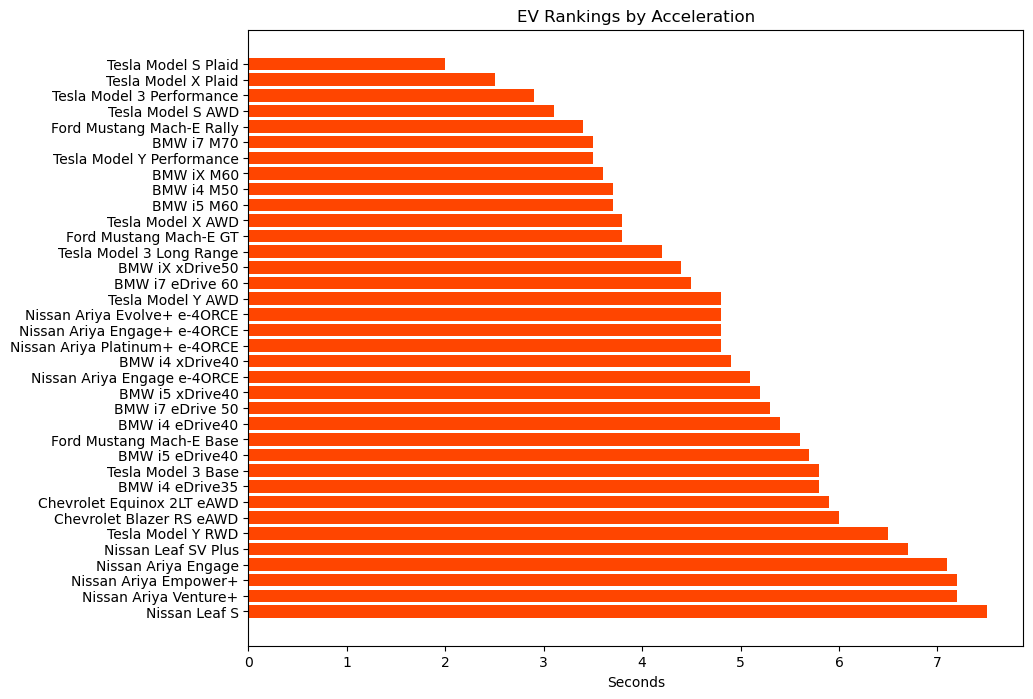

In [15]:
# Plot EV models by Acceleration
ev_data_sorted = ev_data.sort_values('0-60mph')

labels = ev_data_sorted.apply(lambda row: f"{row['Make']} {row['Model']}", axis=1)

plt.figure(figsize=(10, 8))
plt.barh(labels, ev_data_sorted['0-60mph'], color='orangered')
plt.xlabel('Seconds')
plt.title('EV Rankings by Acceleration')
plt.gca().invert_yaxis() 

plt.show()

### Those Who are Sensitive to Value, and Want the Best Value for Money on Performance

In [16]:
ev_data = ev_data.sort_values('0-60mph*Price').reset_index(drop=True)
ev_data.index = ev_data.index + 1

best_value_for_performance = ev_data.head().style.applymap(lambda x: 'background-color: yellow', subset=['0-60mph*Price']).format(precision=2)
best_value_for_performance

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
1,Tesla,Model 3 Performance,Sedan,"$53,990","$7,500","$46,490",296,2.90,6.37,1.35,5.02
2,Tesla,Model Y Performance,Crossover SUV,"$51,490","$7,500","$43,990",279,3.50,6.34,1.54,4.80
3,Tesla,Model S Plaid,Luxury Sedan,"$87,990",$0,"$87,990",359,2.00,4.08,1.75,2.33
4,Nissan,Leaf S,Hatchback,"$28,140","$3,750","$24,390",149,7.50,6.11,1.83,4.28
5,Tesla,Model Y AWD,Crossover SUV,"$47,990","$7,500","$40,490",310,4.80,7.66,1.94,5.71


- The Tesla Model 3 Performance wins this one, offering a 2.9s 0-60mph time for only $46,490. That's supercar level performance at a fraction of the cost!

In [17]:
ev_data = ev_data.sort_values('0-60mph*Price', ascending = False)
ev_data.index = ev_data.index + 1

worst_value_for_performance = ev_data.head().style.applymap(lambda x: 'background-color: yellow', subset=['0-60mph*Price']).format(precision=2)
worst_value_for_performance

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
37,BMW,i7 M70,Ultra-Luxury Sedan,"$168,500",$0,"$168,500",291,3.50,1.73,5.90,-4.17
36,BMW,i7 eDrive 50,Ultra-Luxury Sedan,"$105,700",$0,"$105,700",321,5.30,3.04,5.60,-2.57
35,BMW,i7 eDrive 60,Ultra-Luxury Sedan,"$124,200",$0,"$124,200",317,4.50,2.55,5.59,-3.04
34,BMW,iX M60,Luxury SUV,"$111,500",$0,"$111,500",285,3.60,2.56,4.01,-1.46
33,Nissan,Ariya Empower+,Crossover SUV,"$53,690",$0,"$53,690",289,7.20,5.38,3.87,1.52


- BMW tends to offer the worst value for performance in the dataset.

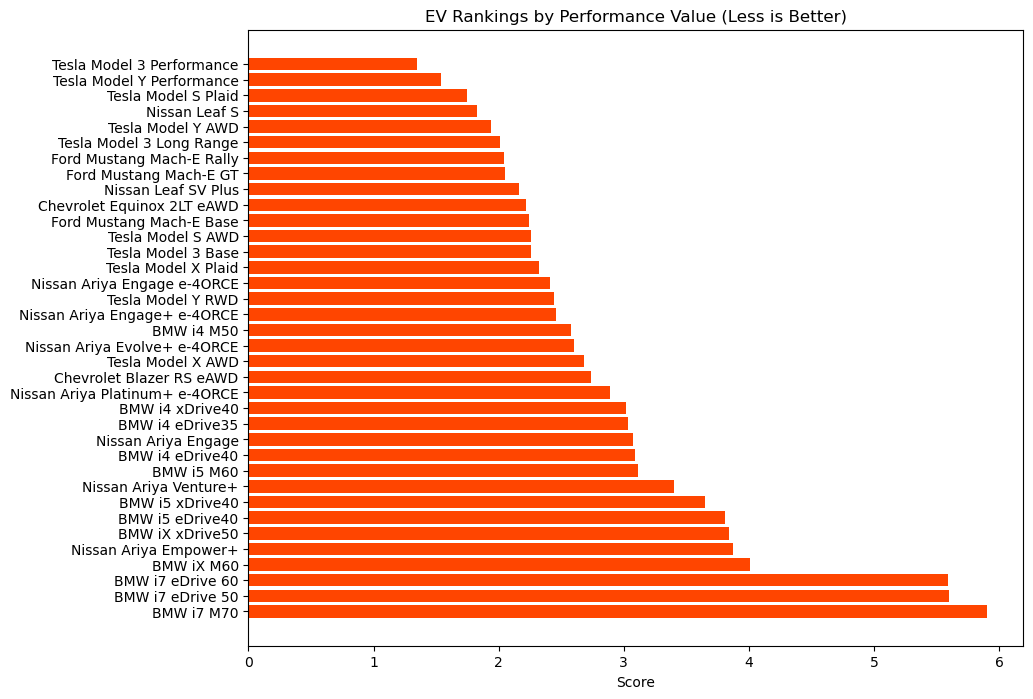

In [18]:
# Plot EV models by 0-60mph*Price Score
ev_data_sorted = ev_data.sort_values('0-60mph*Price')

labels = ev_data_sorted.apply(lambda row: f"{row['Make']} {row['Model']}", axis=1)

plt.figure(figsize=(10, 8))
plt.barh(labels, ev_data_sorted['0-60mph*Price'], color='orangered')
plt.xlabel('Score')
plt.title('EV Rankings by Performance Value (Less is Better)')
plt.gca().invert_yaxis() 

plt.show()

It is interesting to note that even though the Nissan Leaf S has the slowest 0-60mph time, it came in at #4 for best performance value since it is also the most affordable EV at a $24,390 purchase price.

### Those Who are Sensitive to Value, and Want the Best Value for Money Overall

In [19]:
ev_data = ev_data.sort_values('Bang/Buck_Score', ascending=False).reset_index(drop=True)
ev_data.index = ev_data.index + 1

best_value_EVs_overall = ev_data.style.applymap(lambda x: 'background-color: yellow', subset=['Bang/Buck_Score']).format(precision=2)
best_value_EVs_overall

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
1,Tesla,Model Y RWD,Crossover SUV,"$44,990","$7,500","$37,490",320,6.50,8.54,2.44,6.10
2,Tesla,Model Y AWD,Crossover SUV,"$47,990","$7,500","$40,490",310,4.80,7.66,1.94,5.71
3,Chevrolet,Equinox 2LT eAWD,Crossover SUV,"$45,200","$7,500","$37,700",285,5.90,7.56,2.22,5.34
4,Tesla,Model 3 Long Range,Sedan,"$47,740",$0,"$47,740",341,4.20,7.14,2.01,5.14
5,Tesla,Model 3 Performance,Sedan,"$53,990","$7,500","$46,490",296,2.90,6.37,1.35,5.02
6,Tesla,Model Y Performance,Crossover SUV,"$51,490","$7,500","$43,990",279,3.50,6.34,1.54,4.80
7,Tesla,Model 3 Base,Sedan,"$38,990",$0,"$38,990",272,5.80,6.98,2.26,4.71
8,Nissan,Leaf SV Plus,Hatchback,"$36,040","$3,750","$32,290",212,6.70,6.57,2.16,4.40
9,Nissan,Leaf S,Hatchback,"$28,140","$3,750","$24,390",149,7.50,6.11,1.83,4.28
10,Ford,Mustang Mach-E Base,Crossover SUV,"$39,995",$0,"$39,995",250,5.60,6.25,2.24,4.01


- Above we can see the full ranking of all EV models by best overall score, and the Tesla Model Y RWD comes out on top as the best value purchase available on the market.

- Most of the top 7 best EVs for overall value are from Tesla, except for the Chevy Equinox 2LT eAWD which makes an impressive appearance at #3.

- Nissan and Ford also have models which make it into the top 10.

- BMW fares the worst, its best value model (i4 eDrive35) coming in at #19, while most of its remaining lineup can be found at the bottom of the list.

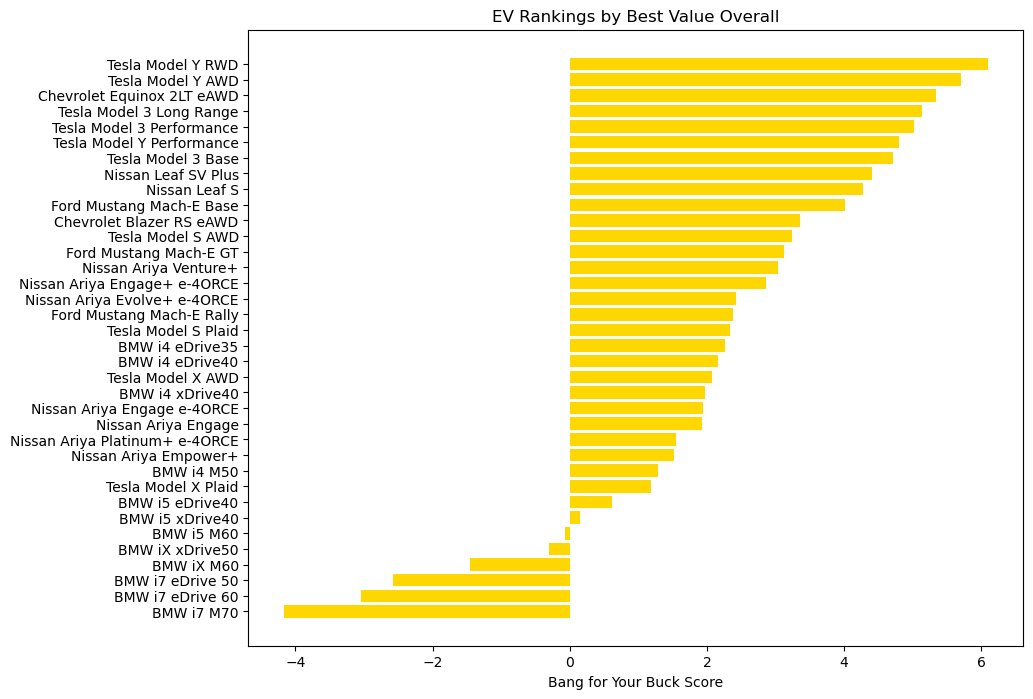

In [20]:
# Plot EV models by 0-60mph*Price Score
ev_data_sorted = ev_data.sort_values('Bang/Buck_Score', ascending = False)

labels = ev_data_sorted.apply(lambda row: f"{row['Make']} {row['Model']}", axis=1)

plt.figure(figsize=(10, 8))
plt.barh(labels, ev_data_sorted['Bang/Buck_Score'], color='gold')
plt.xlabel('Bang for Your Buck Score')
plt.title('EV Rankings by Best Value Overall')
plt.gca().invert_yaxis() 

plt.show()

- The Tesla Model Y is a SUV, but not all consumers might be in the market for SUVs, so we will further breakdown the winners for each vehicle type:

### Sedan

In [21]:
# Filtering the dataset for 'Sedan' type vehicles and then sorting by 'Best Bang/Buck'
best_sedans_data = ev_data[ev_data['Type'] == 'Sedan'].sort_values('Bang/Buck_Score', ascending=False).reset_index(drop=True)
best_sedans_data.index = best_sedans_data.index + 1

best_sedans = best_sedans_data.style.applymap(lambda x: 'background-color: yellow', subset=['Bang/Buck_Score']).format(precision=2)
best_sedans

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
1,Tesla,Model 3 Long Range,Sedan,"$47,740",$0,"$47,740",341,4.20,7.14,2.01,5.14
2,Tesla,Model 3 Performance,Sedan,"$53,990","$7,500","$46,490",296,2.90,6.37,1.35,5.02
3,Tesla,Model 3 Base,Sedan,"$38,990",$0,"$38,990",272,5.80,6.98,2.26,4.71
4,BMW,i4 eDrive35,Sedan,"$52,200",$0,"$52,200",276,5.80,5.29,3.03,2.26
5,BMW,i4 eDrive40,Sedan,"$57,300",$0,"$57,300",301,5.40,5.25,3.09,2.16
6,BMW,i4 xDrive40,Sedan,"$61,600",$0,"$61,600",307,4.90,4.98,3.02,1.97
7,BMW,i4 M50,Sedan,"$69,700",$0,"$69,700",269,3.70,3.86,2.58,1.28


- The Tesla Model 3 Long Range wins in this category!

- It is also obvious that Tesla offers much better value than the BMWs. Take the Model 3 Base vs the i4 eDrive 35 for example:

- They both have almost identical stats for range and 0-60mph time, but the Tesla is ~$13k cheaper!

### Crossover SUV

In [22]:
cross_over_data = ev_data[ev_data['Type'] == 'Crossover SUV'].sort_values('Bang/Buck_Score', ascending=False).reset_index(drop=True)
cross_over_data.index = cross_over_data.index + 1

best_crossovers = cross_over_data.style.applymap(lambda x: 'background-color: yellow', subset=['Bang/Buck_Score']).format(precision=2)
best_crossovers

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
1,Tesla,Model Y RWD,Crossover SUV,"$44,990","$7,500","$37,490",320,6.50,8.54,2.44,6.10
2,Tesla,Model Y AWD,Crossover SUV,"$47,990","$7,500","$40,490",310,4.80,7.66,1.94,5.71
3,Chevrolet,Equinox 2LT eAWD,Crossover SUV,"$45,200","$7,500","$37,700",285,5.90,7.56,2.22,5.34
4,Tesla,Model Y Performance,Crossover SUV,"$51,490","$7,500","$43,990",279,3.50,6.34,1.54,4.80
5,Ford,Mustang Mach-E Base,Crossover SUV,"$39,995",$0,"$39,995",250,5.60,6.25,2.24,4.01
6,Chevrolet,Blazer RS eAWD,Crossover SUV,"$53,200","$7,500","$45,700",279,6.00,6.11,2.74,3.36
7,Ford,Mustang Mach-E GT,Crossover SUV,"$53,995",$0,"$53,995",280,3.80,5.19,2.05,3.13
8,Nissan,Ariya Venture+,Crossover SUV,"$47,190",$0,"$47,190",304,7.20,6.44,3.40,3.04
9,Nissan,Ariya Engage+ e-4ORCE,Crossover SUV,"$51,190",$0,"$51,190",272,4.80,5.31,2.46,2.86
10,Nissan,Ariya Evolve+ e-4ORCE,Crossover SUV,"$54,190",$0,"$54,190",272,4.80,5.02,2.60,2.42


- The Tesla Model Y RWD wins again in this category.
- The Chevy Equinox 2LT eAWD provides a competitive option for those looking at other brands besides a Tesla.
- The Ford Mustang Mach-E Base is also a decent option.
- Most of the Nissan models offer pretty bad value overall.

### Luxury Sedan

In [23]:
luxury_sedan_data = ev_data[ev_data['Type'] == 'Luxury Sedan'].sort_values('Bang/Buck_Score', ascending=False).reset_index(drop=True)
luxury_sedan_data.index = luxury_sedan_data.index + 1

best_luxury_sedans = luxury_sedan_data.style.applymap(lambda x: 'background-color: yellow', subset=['Bang/Buck_Score']).format(precision=2)
best_luxury_sedans

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
1,Tesla,Model S AWD,Luxury Sedan,"$72,990",$0,"$72,990",402,3.10,5.51,2.26,3.24
2,Tesla,Model S Plaid,Luxury Sedan,"$87,990",$0,"$87,990",359,2.00,4.08,1.75,2.33
3,BMW,i5 eDrive40,Luxury Sedan,"$66,800",$0,"$66,800",295,5.70,4.42,3.81,0.61
4,BMW,i5 xDrive40,Luxury Sedan,"$70,100",$0,"$70,100",266,5.20,3.79,3.65,0.15
5,BMW,i5 M60,Luxury Sedan,"$84,100",$0,"$84,100",256,3.70,3.04,3.11,-0.07


- The Tesla Model S AWD wins this category, and again, it is apparent how much more value Tesla provides over BMW.

- The i5 xDrive40 is at a very similar price point but offers 136 miles less range and 2.1s slower 0-60mph time, which is a crazy difference for almost the same price!

### Luxury SUV

In [24]:
luxury_suv_data = ev_data[ev_data['Type'] == 'Luxury SUV'].sort_values('Bang/Buck_Score', ascending=False).reset_index(drop=True)
luxury_suv_data.index = luxury_suv_data.index + 1

best_luxury_suvs = luxury_suv_data.style.applymap(lambda x: 'background-color: yellow', subset=['Bang/Buck_Score']).format(precision=2)
best_luxury_suvs

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
1,Tesla,Model X AWD,Luxury SUV,"$77,990","$7,500","$70,490",335,3.80,4.75,2.68,2.07
2,Tesla,Model X Plaid,Luxury SUV,"$92,990",$0,"$92,990",326,2.50,3.51,2.32,1.18
3,BMW,iX xDrive50,Luxury SUV,"$87,250",$0,"$87,250",309,4.40,3.54,3.84,-0.30
4,BMW,iX M60,Luxury SUV,"$111,500",$0,"$111,500",285,3.60,2.56,4.01,-1.46


- The Tesla Model X AWD wins this category, and the trend of Tesla vs BMW continues.

### EV Ranking Adjustments

While separating EV models into different categories based on vehicle type, it became apparent that the vehicle type itself is a factor that can provide more value for one category compared to others. Take SUVs for example, which tend to offer more utility than Sedans since they offer more storage space and can work better as a family car. Luxury vehicles also provide additional benefits such as improved materials, comfort, and technology.

To take this into account when comparing vehicles across different types, we will add some adjustmetns to the final score of each EV:

In [25]:
adjustments = {
    'Hatchback': -0.25,
    'Crossover SUV': 0.25,
    'Luxury Sedan': 1,
    'Luxury SUV': 1.5,
    'Ultra-Luxury Sedan': 2
}

# Applying the adjustments to the 'Best Bang/Buck' column
ev_data['Bang/Buck_Score'] = ev_data.apply(
    lambda row: row['Bang/Buck_Score'] + adjustments.get(row['Type'], 0), axis=1
)

ev_data = ev_data.sort_values('Bang/Buck_Score', ascending=False).reset_index(drop=True)
ev_data.index = ev_data.index + 1

best_evs_overall = ev_data.style.applymap(lambda x: 'background-color: yellow', subset=['Bang/Buck_Score']).format(precision=2)
best_evs_overall

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score
1,Tesla,Model Y RWD,Crossover SUV,"$44,990","$7,500","$37,490",320,6.50,8.54,2.44,6.35
2,Tesla,Model Y AWD,Crossover SUV,"$47,990","$7,500","$40,490",310,4.80,7.66,1.94,5.96
3,Chevrolet,Equinox 2LT eAWD,Crossover SUV,"$45,200","$7,500","$37,700",285,5.90,7.56,2.22,5.59
4,Tesla,Model 3 Long Range,Sedan,"$47,740",$0,"$47,740",341,4.20,7.14,2.01,5.14
5,Tesla,Model Y Performance,Crossover SUV,"$51,490","$7,500","$43,990",279,3.50,6.34,1.54,5.05
6,Tesla,Model 3 Performance,Sedan,"$53,990","$7,500","$46,490",296,2.90,6.37,1.35,5.02
7,Tesla,Model 3 Base,Sedan,"$38,990",$0,"$38,990",272,5.80,6.98,2.26,4.71
8,Ford,Mustang Mach-E Base,Crossover SUV,"$39,995",$0,"$39,995",250,5.60,6.25,2.24,4.26
9,Tesla,Model S AWD,Luxury Sedan,"$72,990",$0,"$72,990",402,3.10,5.51,2.26,4.24
10,Nissan,Leaf SV Plus,Hatchback,"$36,040","$3,750","$32,290",212,6.70,6.57,2.16,4.15


- Although this is an inherently subjective way to adjust the scores, it at least helps create a more accurate picture if one is trying to compare the best value across multiple vehilce types. If one is just comparing EVs within the same vehicle type, then adding adjustments is not necessary. 

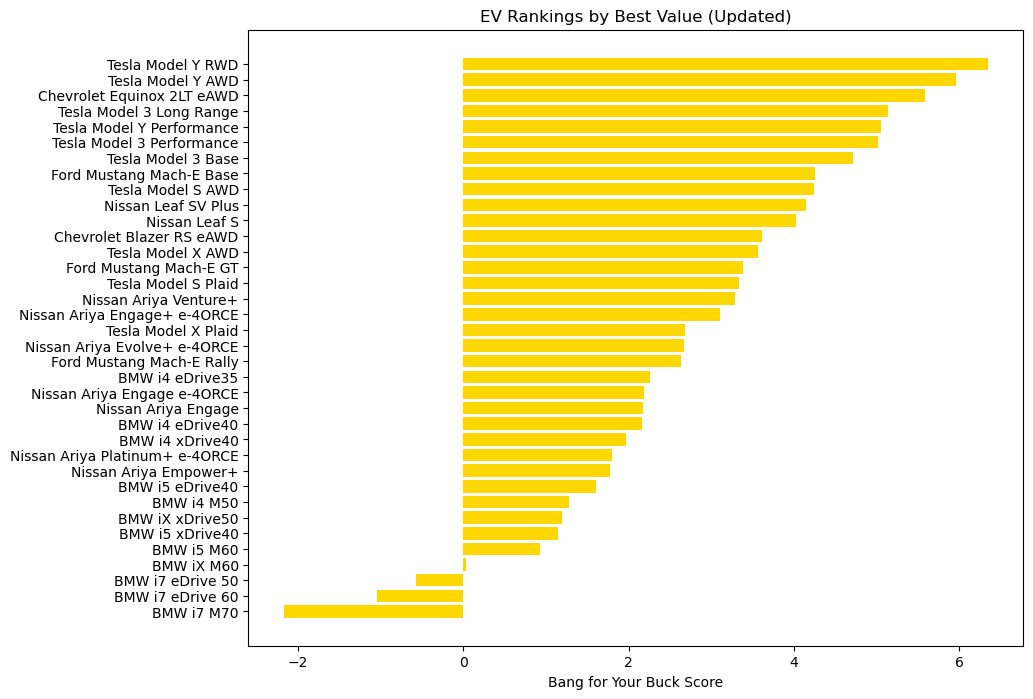

In [26]:
ev_data_sorted = ev_data.sort_values('Bang/Buck_Score', ascending = False)

labels = ev_data_sorted.apply(lambda row: f"{row['Make']} {row['Model']}", axis=1)

plt.figure(figsize=(10, 8))
plt.barh(labels, ev_data_sorted['Bang/Buck_Score'], color='Gold')
plt.xlabel('Bang for Your Buck Score')
plt.title('EV Rankings by Best Value (Updated)')
plt.gca().invert_yaxis() 

plt.show()

Next, it would also be useful to create categories which classify how good or how bad the score for each vehicle is.

We will create 9 separate categories:

- Best: Reserved for the EV with the best overall value.
- Excellent: Reserved for EVs with an overall score above a 5.
- Great: Reserved for EVs with an overall score between a 4 and a 5.
- Good: Reserved for EVs with an overall score between a 3 and a 4.
- Neutral: Reserved for EVs with an overall score between a 2.5 and a 3.
- Bad: Reserved for EVs with an overall score between a 2 and a 2.5.
- Terrible: Reserved for EVs with an overall score between a 1 and a 2.
- Worst: Reserved for the EV with the worst overall (non-negative) value.
- Avoid: Reserved for EVs with a negative value for money.

### EV Ranking Categories

In [27]:
def categorize_score(score):
    if score > 6:
        return 'Best'
    elif score > 5:
        return 'Excellent'
    elif score > 4:
        return 'Great'
    elif score > 3:
        return 'Good'
    elif score > 2.5:
        return 'Neutral'
    elif score > 2:
        return 'Bad'
    elif score > 0.9:
        return 'Terrible'
    elif score > 0:
        return 'Worst'
    else:
        return 'Avoid'
    
    
# Apply the categorization function to the Bang/Buck column
ev_data['Category'] = ev_data['Bang/Buck_Score'].apply(categorize_score)

# Sort the data by price in descending order
ev_data_sorted = ev_data.sort_values('Bang/Buck_Score', ascending=False)

best_evs_overall = ev_data.style.applymap(lambda x: 'background-color: yellow', subset=['Category']).format(precision=2)
best_evs_overall

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score,Category
1,Tesla,Model Y RWD,Crossover SUV,"$44,990","$7,500","$37,490",320,6.50,8.54,2.44,6.35,Best
2,Tesla,Model Y AWD,Crossover SUV,"$47,990","$7,500","$40,490",310,4.80,7.66,1.94,5.96,Excellent
3,Chevrolet,Equinox 2LT eAWD,Crossover SUV,"$45,200","$7,500","$37,700",285,5.90,7.56,2.22,5.59,Excellent
4,Tesla,Model 3 Long Range,Sedan,"$47,740",$0,"$47,740",341,4.20,7.14,2.01,5.14,Excellent
5,Tesla,Model Y Performance,Crossover SUV,"$51,490","$7,500","$43,990",279,3.50,6.34,1.54,5.05,Excellent
6,Tesla,Model 3 Performance,Sedan,"$53,990","$7,500","$46,490",296,2.90,6.37,1.35,5.02,Excellent
7,Tesla,Model 3 Base,Sedan,"$38,990",$0,"$38,990",272,5.80,6.98,2.26,4.71,Great
8,Ford,Mustang Mach-E Base,Crossover SUV,"$39,995",$0,"$39,995",250,5.60,6.25,2.24,4.26,Great
9,Tesla,Model S AWD,Luxury Sedan,"$72,990",$0,"$72,990",402,3.10,5.51,2.26,4.24,Great
10,Nissan,Leaf SV Plus,Hatchback,"$36,040","$3,750","$32,290",212,6.70,6.57,2.16,4.15,Great


- Based on initial inspection, it seems like the category assigned to each EV model makes a lot of sense.
- Now let's count how many EVs fall into each category:

In [28]:
category_counts = ev_data_sorted['Category'].value_counts()
category_counts

Terrible     8
Good         6
Excellent    5
Great        5
Bad          4
Neutral      3
Avoid        3
Best         1
Worst        1
Name: Category, dtype: int64

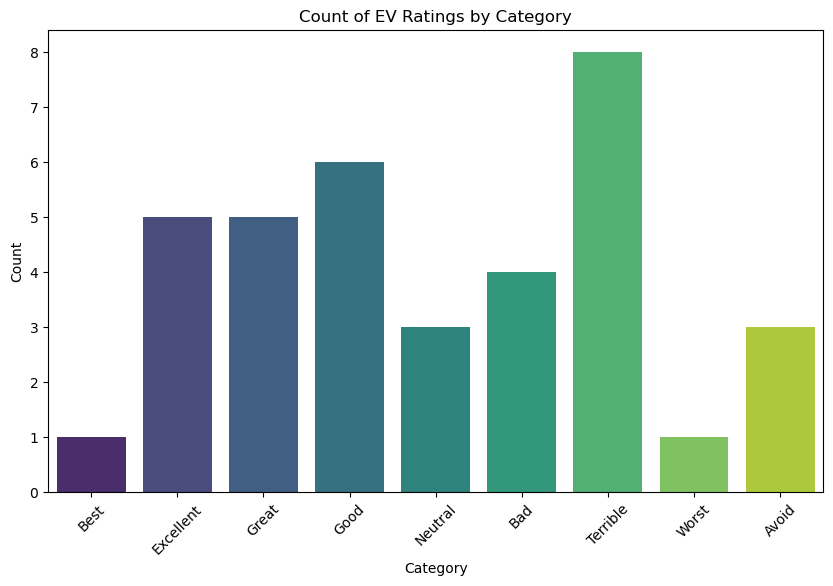

In [29]:
# Countplot for the "Category" column
plt.figure(figsize=(10, 6))
sns.countplot(data=ev_data_sorted, x='Category', palette='viridis')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of EV Ratings by Category')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

There can only be one best and one worst model, but it is surprising to see how many models fall into the "terrible" category. Thankfully, there is also a decent amount of models which fall into the good/great/excellent categories, so consumers can be rest assured that there are plenty of good value for money options to choose from.

Next, let's see how the EV models fall into each category broken down by each different brand:

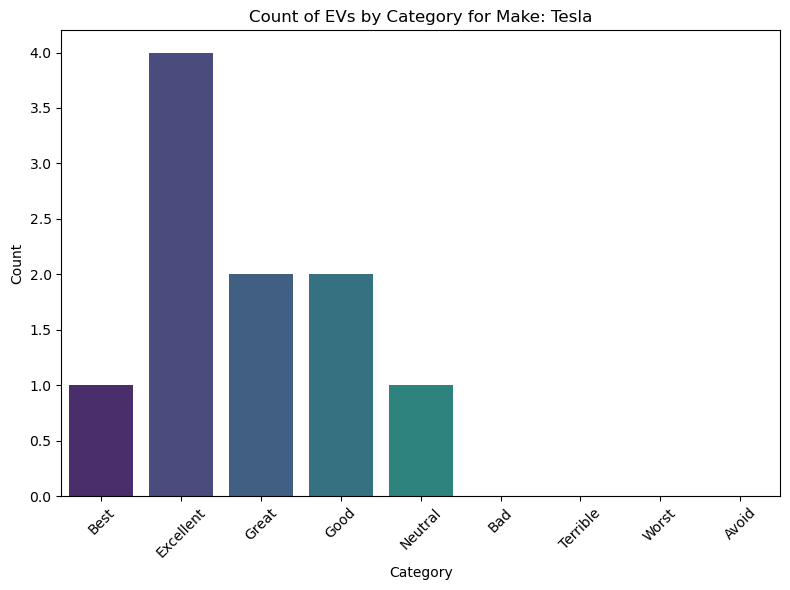

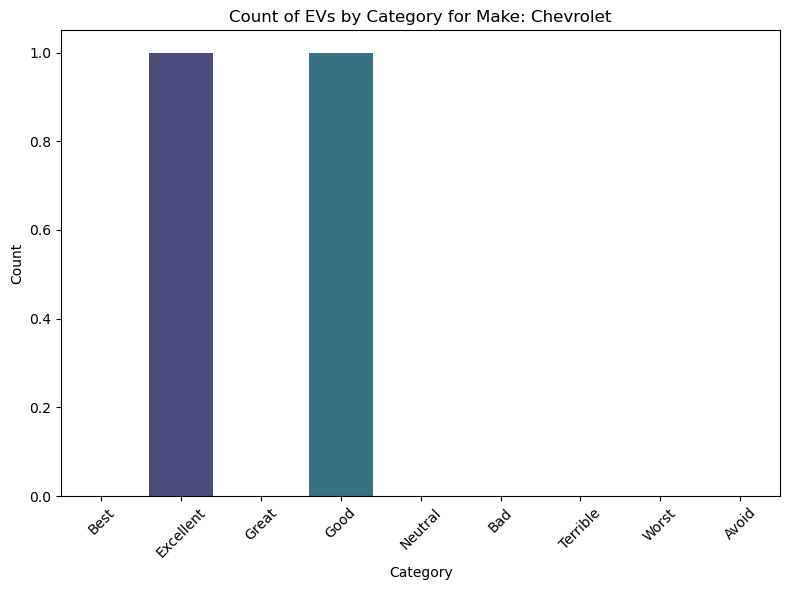

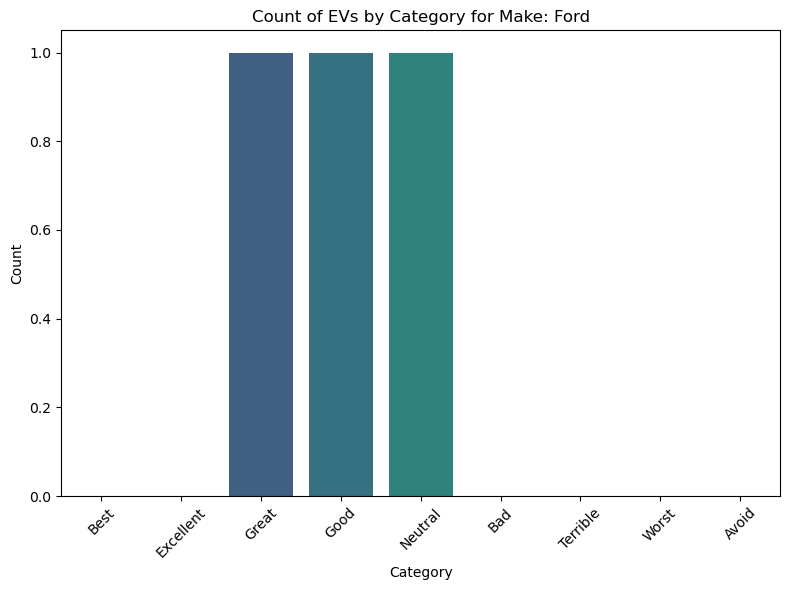

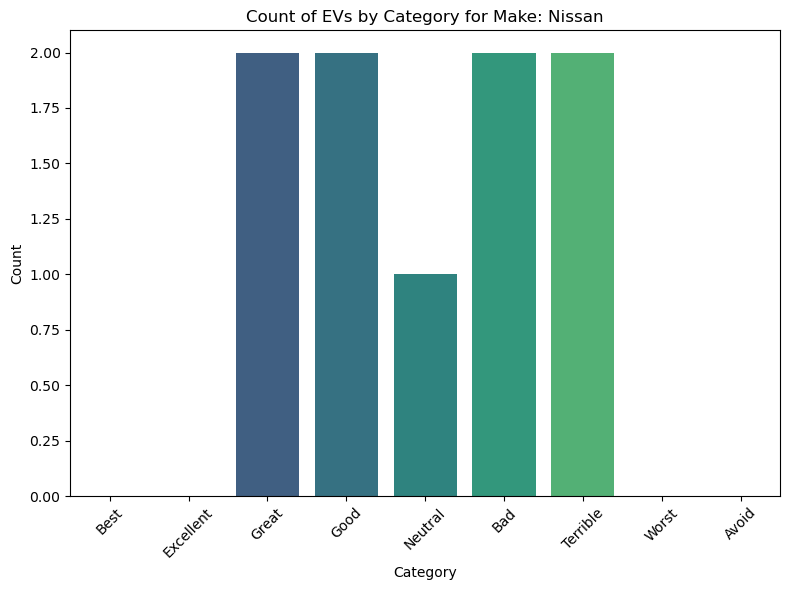

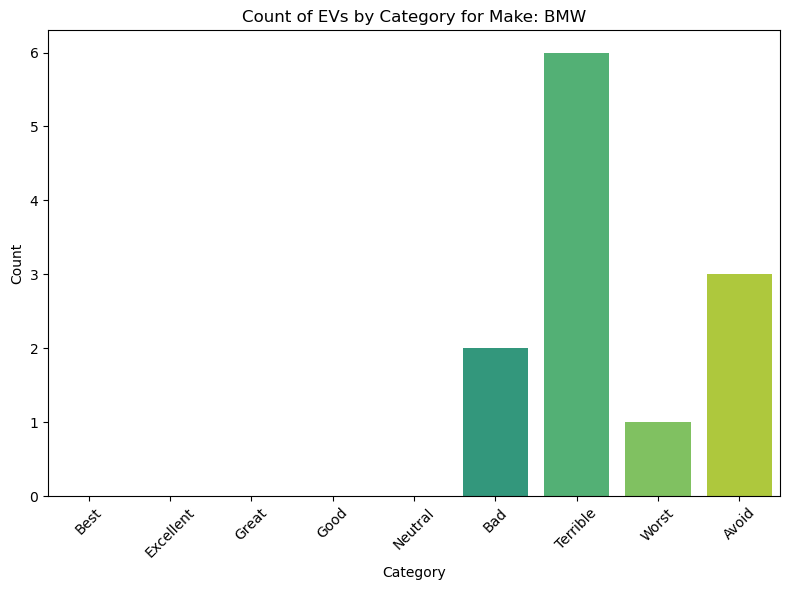

In [30]:
# Get the unique makes from the dataset
unique_makes = ev_data_sorted['Make'].unique()

# Loop through each make and plot a countplot for the "Category" column
for make in unique_makes:
    plt.figure(figsize=(8, 6))
    subset = ev_data_sorted[ev_data_sorted['Make'] == make]  # Filter the data for the specific make
    sns.countplot(data=subset, x='Category', palette='viridis', order=['Best', 'Excellent', 'Great', 'Good', 'Neutral', 'Bad', 'Terrible', 'Worst', 'Avoid'])
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title(f'Count of EVs by Category for Make: {make}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The stark contrast between Tesla and BMW can again be seen, while all the other brands fall somewhere in between.

Next, we want to get a sense of the overall distribution for how may models offer neutral value for money, better than neutral, and worse than neutral. To accomplish this, we will split up our original categories and simplify them into the following groups:

- Good Value: Good/Great/Excellent/Best Scores.
- Neutral Value: Neutral Scores.
- Bad Value: Bad/Terrible/Worst/Avoid Scores.

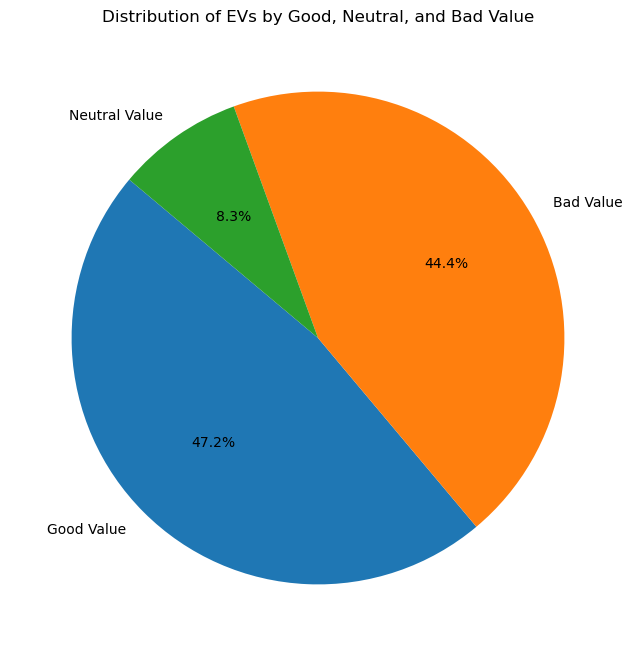

In [31]:
# Create a mapping to group the original categories into "Good Value," "Neutral," and "Bad Value"
category_mapping = {
    'Best': 'Good Value',
    'Excellent': 'Good Value',
    'Great': 'Good Value',
    'Good': 'Good Value',
    'Neutral': 'Neutral Value',
    'Bad': 'Bad Value',
    'Terrible': 'Bad Value',
    'Worst': 'Bad Value',
    'Avoid': 'Bad Value'
}

# Apply the mapping to create a new column with grouped categories
ev_data_sorted['Grouped_Category'] = ev_data_sorted['Category'].map(category_mapping)

# Count the occurrences of each grouped category
grouped_category_counts = ev_data_sorted['Grouped_Category'].value_counts()

# Create a pie chart with the counts of grouped categories
plt.figure(figsize=(8, 8))
plt.pie(
    grouped_category_counts,
    labels=grouped_category_counts.index,
    autopct='%1.1f%%',  # Show percentage values with one decimal place
    startangle=140      # Rotate the pie chart for better view
)
plt.title('Distribution of EVs by Good, Neutral, and Bad Value')
plt.show()

- This represents that about half the EV models on the market currently offer "bad" value for your money, while the other half offers "good" value, and a smaller portion remains "neutral".
- If you were going in blind into an EV purchase, you would have almost a 50/50 chance of making a bad purchasing decision.

Now, let's consider different budgets for potential EV buyers and give them a recommendation for which vehicle to purchase under each budget:

### EV Ranking By Budget

First we will create the code to slice the dataframe into each budget category:

In [32]:
ev_data['Purchase_Price'] = ev_data['Purchase_Price'].replace('[\$,]', '', regex=True).astype(int)

# Creating the specified dataframes based on price ranges
df_less_30k = ev_data[ev_data['Purchase_Price'] < 30000]
df_30k_to_40k = ev_data[(ev_data['Purchase_Price'] >= 30000) & (ev_data['Purchase_Price'] < 40000)]
df_40k_to_50k = ev_data[(ev_data['Purchase_Price'] >= 40000) & (ev_data['Purchase_Price'] < 50000)]
df_50k_to_60k = ev_data[(ev_data['Purchase_Price'] >= 50000) & (ev_data['Purchase_Price'] < 60000)]
df_60k_to_80k = ev_data[(ev_data['Purchase_Price'] >= 60000) & (ev_data['Purchase_Price'] < 80000)]
df_80k_to_100k = ev_data[(ev_data['Purchase_Price'] >= 80000) & (ev_data['Purchase_Price'] < 100000)]
df_above_100k = ev_data[ev_data['Purchase_Price'] >= 100000]

Then we will create the code that will create bar charts to visually represent the EVs in each budget:

In [33]:
def get_color(score):
    """Return the color based on the score ranges."""
    if score > 6:
        return 'cyan'
    elif score > 5:
        return 'gold'
    elif score > 4:
        return 'silver'
    elif score > 3:
        return 'peru'  # Bronze-like color
    elif score > 2.5:
        return 'whitesmoke'
    elif score > 0:
        return 'black'
    else:
        return 'red'

def plot_bang_buck(df, title):
    # Sort the DataFrame by Bang/Buck score in ascending order
    sorted_df = df.sort_values('Bang/Buck_Score', ascending=True)

    # Combine 'Make' and 'Model' into a single label for each row
    sorted_df['Make_Model'] = sorted_df['Make'] + ' ' + sorted_df['Model']

    # Generate a list of colors based on the Bang/Buck scores
    bar_colors = [get_color(score) for score in sorted_df['Bang/Buck_Score']]

    # Plot the horizontal bar chart with the custom colors
    plt.figure(figsize=(10, 8))
    plt.barh(sorted_df['Make_Model'], sorted_df['Bang/Buck_Score'], color=bar_colors)
    plt.xlabel('Bang for Your Buck Score')
    plt.ylabel('Make and Model')
    plt.title(title)

    plt.show()

Finally, we will create a legend to explain what the colors mean for each bar in the bar chart:

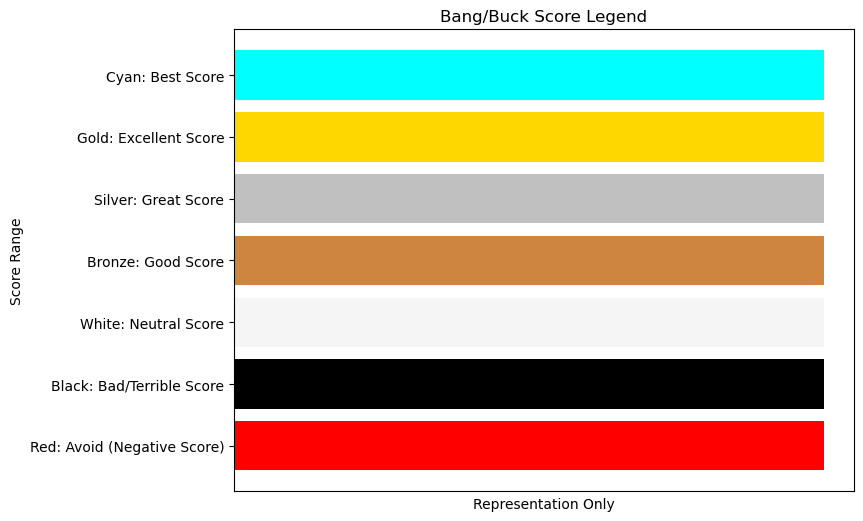

In [34]:
# Define the ranking data with their corresponding colors
legend_data = {
    'Score Range': ['Cyan: Best Score', 'Gold: Excellent Score', 'Silver: Great Score', 
                    'Bronze: Good Score', 'White: Neutral Score', 
                    'Black: Bad/Terrible Score', 'Red: Avoid (Negative Score)'],
    'Color': ['Cyan', 'Gold', 'Silver', 'Peru', 'Whitesmoke', 'Black', 'Red']
}

# Create a DataFrame from the ranking data
legend_df = pd.DataFrame(legend_data)

# Create a mapping of the colors
color_mapping = {
    'Cyan': 'cyan',
    'Gold': 'gold',
    'Silver': 'silver',
    'Peru': 'peru',
    'Whitesmoke': 'whitesmoke',
    'Black': 'black',
    'Red': 'red'
}

# Map the color names to the actual colors
legend_df['Color Value'] = legend_df['Color'].map(color_mapping)

# Reverse the order of the DataFrame by flipping it
legend_df = legend_df.iloc[::-1]

# Plot a horizontal bar chart to represent the ranking system
plt.figure(figsize=(8, 6))
plt.barh(legend_df['Score Range'], [1] * len(legend_df), color=legend_df['Color Value'])
plt.xlabel('Representation Only')  # No actual data values needed
plt.ylabel('Score Range')
plt.title('Bang/Buck Score Legend')
plt.xticks([])
plt.show()

### Less than \\$30k:

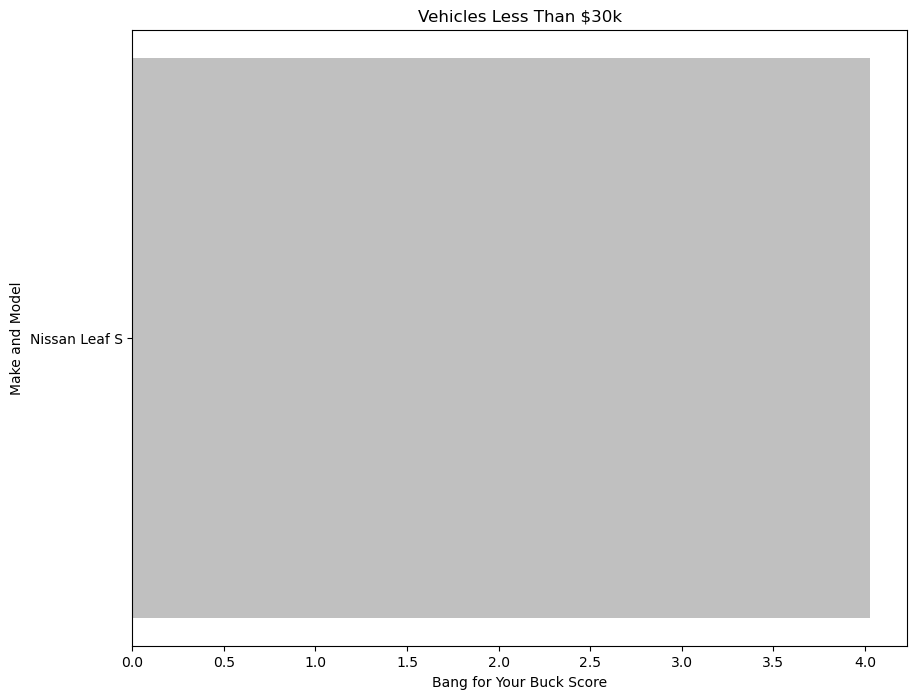

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score,Category
11,Nissan,Leaf S,Hatchback,"$28,140","$3,750",24390,149,7.5,6.11,1.83,4.03,Great


In [35]:
plot_bang_buck(df_less_30k, 'Vehicles Less Than $30k')
df_less_30k

- The Nissan Leaf S is the only vehicle in this category, so if this is you're budget that is the only EV you can go with. However, it does offer great value for money, so at least you would be getting a good deal!

### Between \\$30k-\\$40k:

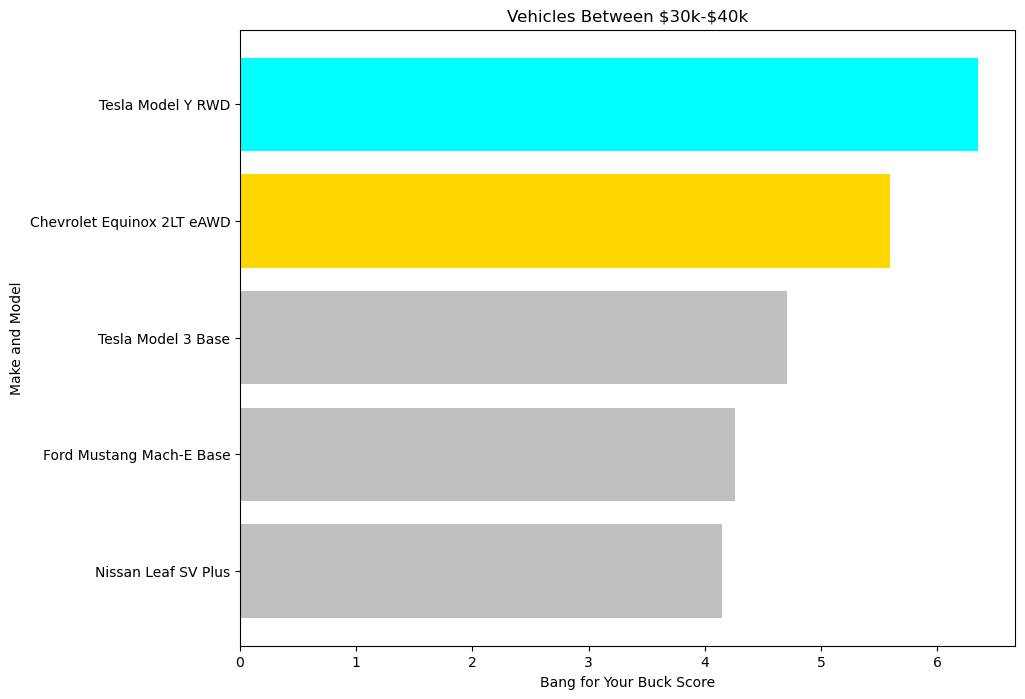

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score,Category
1,Tesla,Model Y RWD,Crossover SUV,"$44,990","$7,500",37490,320,6.5,8.54,2.44,6.35,Best
3,Chevrolet,Equinox 2LT eAWD,Crossover SUV,"$45,200","$7,500",37700,285,5.9,7.56,2.22,5.59,Excellent
7,Tesla,Model 3 Base,Sedan,"$38,990",$0,38990,272,5.8,6.98,2.26,4.71,Great
8,Ford,Mustang Mach-E Base,Crossover SUV,"$39,995",$0,39995,250,5.6,6.25,2.24,4.26,Great
10,Nissan,Leaf SV Plus,Hatchback,"$36,040","$3,750",32290,212,6.7,6.57,2.16,4.15,Great


In [36]:
plot_bang_buck(df_30k_to_40k, 'Vehicles Between \\$30k-\\$40k')
df_30k_to_40k

- The Tesla Model Y RWD was the overall winner in terms of value for money, so if you're within this budget that is the best option to go with!
- However, the Chevy Equinox 2LT eAWD also offers excellent value for money.
- Both Ford and Nissan also have some great options to choose from.

### Between \\$40k-\\$50k:

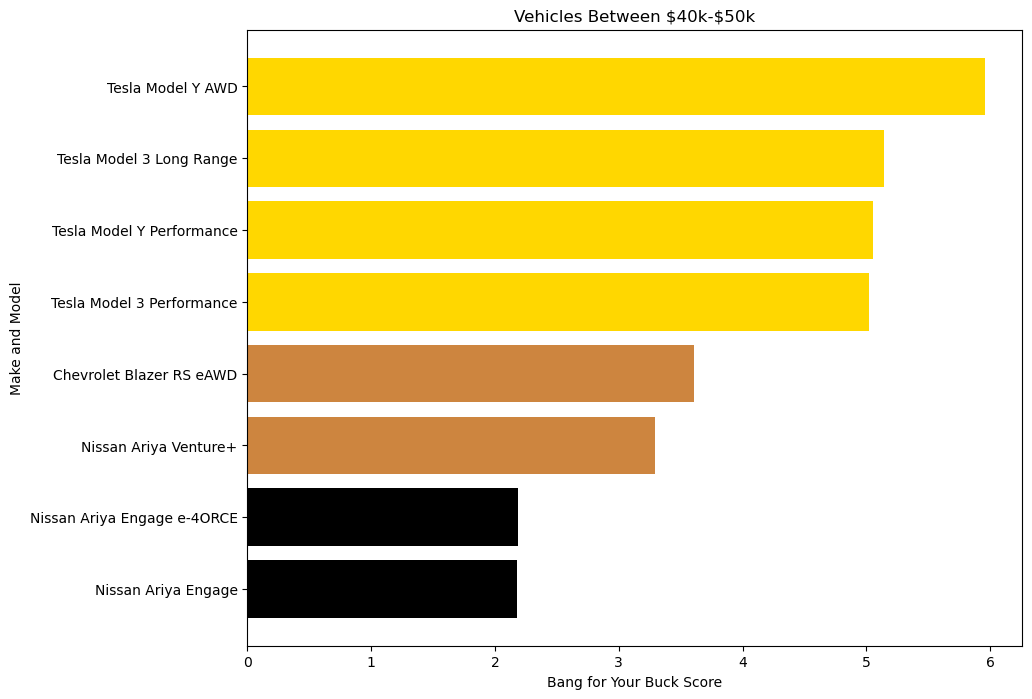

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score,Category
2,Tesla,Model Y AWD,Crossover SUV,"$47,990","$7,500",40490,310,4.8,7.66,1.94,5.96,Excellent
4,Tesla,Model 3 Long Range,Sedan,"$47,740",$0,47740,341,4.2,7.14,2.01,5.14,Excellent
5,Tesla,Model Y Performance,Crossover SUV,"$51,490","$7,500",43990,279,3.5,6.34,1.54,5.05,Excellent
6,Tesla,Model 3 Performance,Sedan,"$53,990","$7,500",46490,296,2.9,6.37,1.35,5.02,Excellent
12,Chevrolet,Blazer RS eAWD,Crossover SUV,"$53,200","$7,500",45700,279,6.0,6.11,2.74,3.61,Good
16,Nissan,Ariya Venture+,Crossover SUV,"$47,190",$0,47190,304,7.2,6.44,3.40,3.29,Good
22,Nissan,Ariya Engage e-4ORCE,Crossover SUV,"$47,190",$0,47190,205,5.1,4.34,2.41,2.19,Bad
23,Nissan,Ariya Engage,Crossover SUV,"$43,190",$0,43190,216,7.1,5.00,3.07,2.18,Bad


In [37]:
plot_bang_buck(df_40k_to_50k, 'Vehicles Between \\$40k-\\$50k')
df_40k_to_50k

- All of the Tesla Model Y and Model 3 trims offer excellent value for money.
- If you want a Crossover SUV go with the Model Y, if you want a Sedan go with the Model 3.
- If you care more about range go with the AWD or Long Range trims, if you care more about performance go with the Performance trims.

### Between \\$50k-\\$60k:

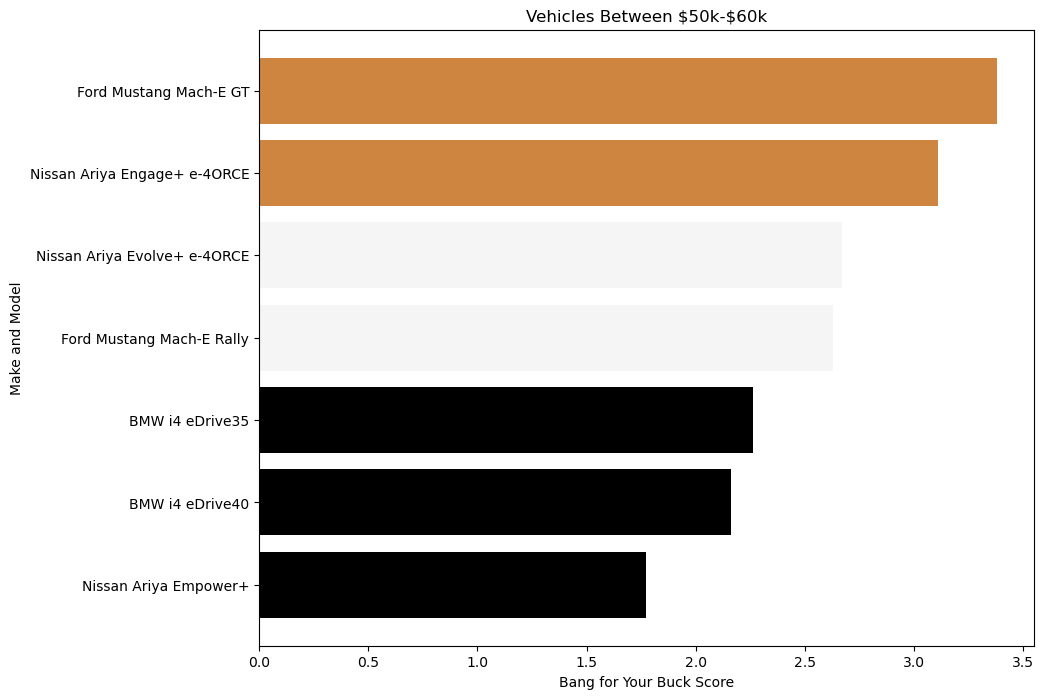

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score,Category
14,Ford,Mustang Mach-E GT,Crossover SUV,"$53,995",$0,53995,280,3.8,5.19,2.05,3.38,Good
17,Nissan,Ariya Engage+ e-4ORCE,Crossover SUV,"$51,190",$0,51190,272,4.8,5.31,2.46,3.11,Good
19,Nissan,Ariya Evolve+ e-4ORCE,Crossover SUV,"$54,190",$0,54190,272,4.8,5.02,2.60,2.67,Neutral
20,Ford,Mustang Mach-E Rally,Crossover SUV,"$59,995",$0,59995,265,3.4,4.42,2.04,2.63,Neutral
21,BMW,i4 eDrive35,Sedan,"$52,200",$0,52200,276,5.8,5.29,3.03,2.26,Bad
24,BMW,i4 eDrive40,Sedan,"$57,300",$0,57300,301,5.4,5.25,3.09,2.16,Bad
27,Nissan,Ariya Empower+,Crossover SUV,"$53,690",$0,53690,289,7.2,5.38,3.87,1.77,Terrible


In [38]:
plot_bang_buck(df_50k_to_60k, 'Vehicles Between \\$50k-\\$60k')
df_50k_to_60k

- Only the Ford Mustang Mach-E GT and Nissan Ariya Engage+ e-4ORCE offer good value for money.
- However, you can get a Model Y Performance for better specs than the Mach-E GT for $10,005 less!
- Doesn't make much sense to purchase any of the vehicles in this budget category - save yourself some money or look for better options that are a bit more expensive:

### Between \\$60k-\\$80k:

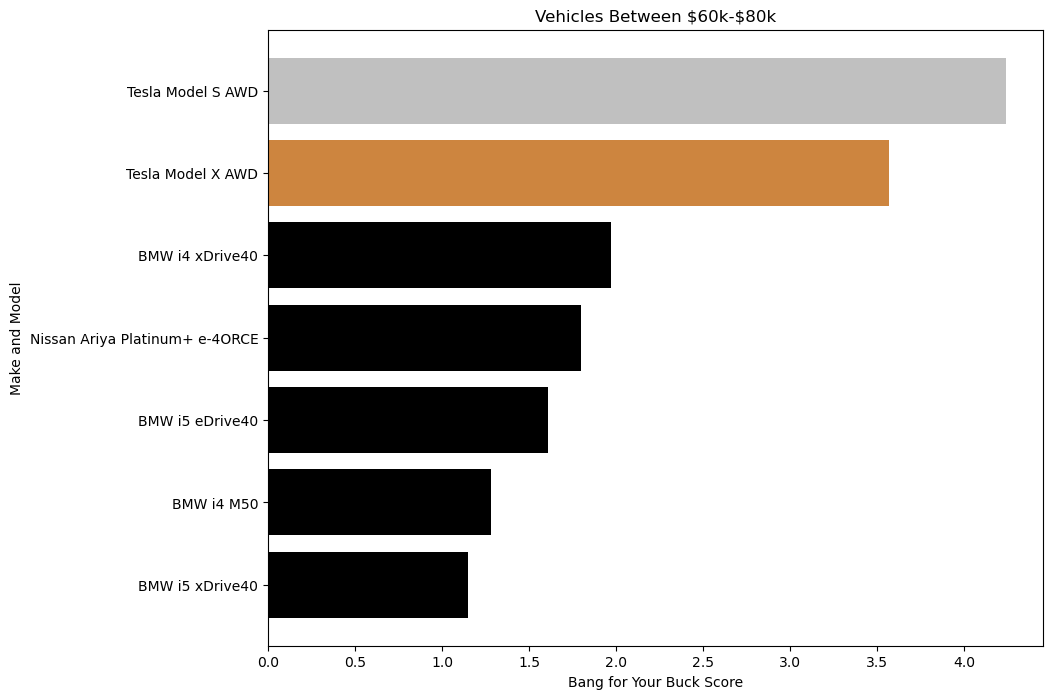

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score,Category
9,Tesla,Model S AWD,Luxury Sedan,"$72,990",$0,72990,402,3.1,5.51,2.26,4.24,Great
13,Tesla,Model X AWD,Luxury SUV,"$77,990","$7,500",70490,335,3.8,4.75,2.68,3.57,Good
25,BMW,i4 xDrive40,Sedan,"$61,600",$0,61600,307,4.9,4.98,3.02,1.97,Terrible
26,Nissan,Ariya Platinum+ e-4ORCE,Crossover SUV,"$60,190",$0,60190,267,4.8,4.44,2.89,1.80,Terrible
28,BMW,i5 eDrive40,Luxury Sedan,"$66,800",$0,66800,295,5.7,4.42,3.81,1.61,Terrible
29,BMW,i4 M50,Sedan,"$69,700",$0,69700,269,3.7,3.86,2.58,1.28,Terrible
31,BMW,i5 xDrive40,Luxury Sedan,"$70,100",$0,70100,266,5.2,3.79,3.65,1.15,Terrible


In [39]:
plot_bang_buck(df_60k_to_80k, 'Vehicles Between \\$60k-\\$80k')
df_60k_to_80k

- The Tesla Model S AWD and Model X AWD are the only vehicles worth purchasing in this budget category.
- Get the Model S if you want a Sedan and the Model X if you want an SUV.

### Between \\$80k-\\$100k:

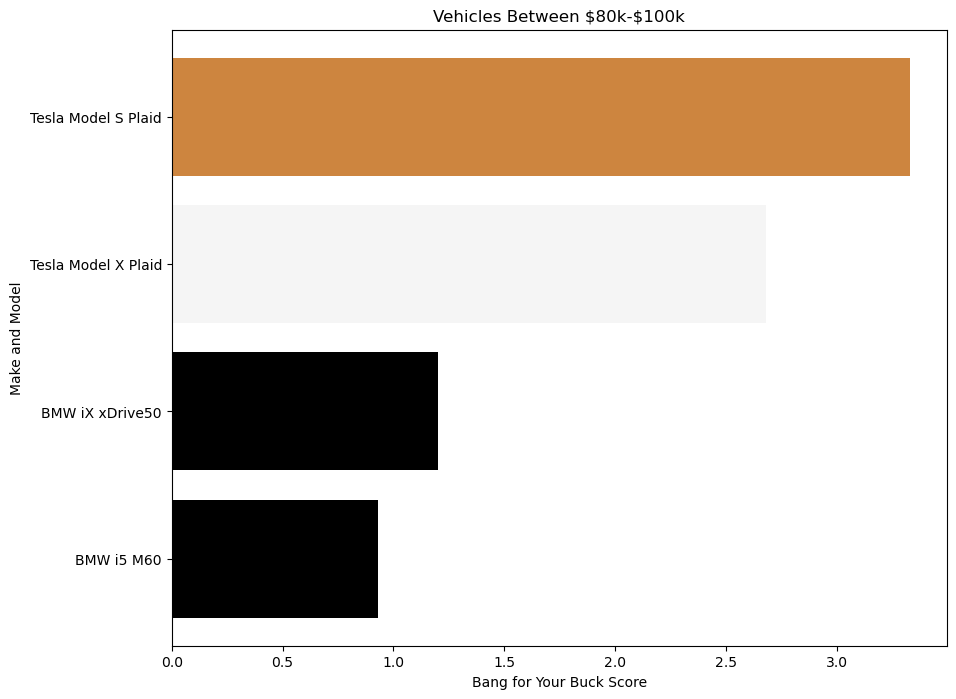

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score,Category
15,Tesla,Model S Plaid,Luxury Sedan,"$87,990",$0,87990,359,2.0,4.08,1.75,3.33,Good
18,Tesla,Model X Plaid,Luxury SUV,"$92,990",$0,92990,326,2.5,3.51,2.32,2.68,Neutral
30,BMW,iX xDrive50,Luxury SUV,"$87,250",$0,87250,309,4.4,3.54,3.84,1.20,Terrible
32,BMW,i5 M60,Luxury Sedan,"$84,100",$0,84100,256,3.7,3.04,3.11,0.93,Terrible


In [40]:
plot_bang_buck(df_80k_to_100k, 'Vehicles Between \\$80k-\\$100k')
df_80k_to_100k

- The Model S Plaid offers the best bang for your buck in this budget category!

### Over $100k:

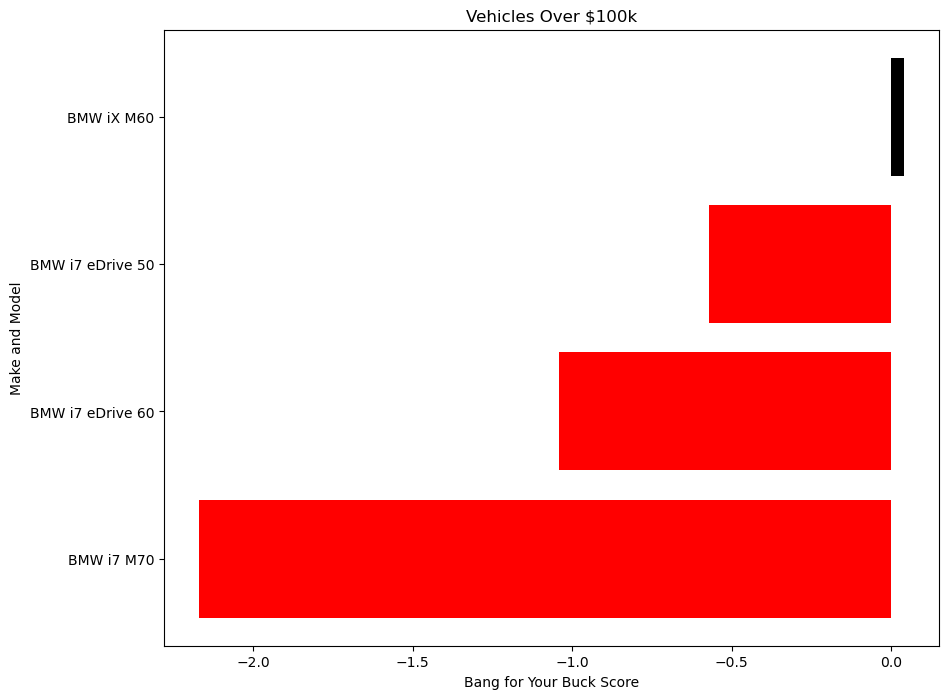

,Make,Model,Type,MSRP,EV_Tax_Credit,Purchase_Price,Range_(mi),0-60mph,Range/Price,0-60mph*Price,Bang/Buck_Score,Category
33,BMW,iX M60,Luxury SUV,"$111,500",$0,111500,285,3.6,2.56,4.01,0.04,Worst
34,BMW,i7 eDrive 50,Ultra-Luxury Sedan,"$105,700",$0,105700,321,5.3,3.04,5.60,-0.57,Avoid
35,BMW,i7 eDrive 60,Ultra-Luxury Sedan,"$124,200",$0,124200,317,4.5,2.55,5.59,-1.04,Avoid
36,BMW,i7 M70,Ultra-Luxury Sedan,"$168,500",$0,168500,291,3.5,1.73,5.90,-2.17,Avoid


In [41]:
plot_bang_buck(df_above_100k, 'Vehicles Over $100k')
df_above_100k

- None of these option would give you a good value for money.
- If you do really want to own a BMW (just for its badge), go with the iX M60 because at least it's not giving you a negative bang for your buck.

---

## EV Bang For Your Buck Calculator

Below I've included a function which calculates the Bang/Buck Score for any EV model. All you have to input is:

- Make
- Model
- Type
- Price
- Range (in miles)
- 0-60mph acceleration time (in seconds)

In [42]:
def bang_for_buck_calculator(make, model, type, price, range_mi, acceleration):
    
    range_value = range_mi/price * 1000
    acceleration_value = acceleration * price / 100000
    score = range_value - acceleration_value
    
    if type == 'Hatchback':
        score = score - 0.25
    elif type == 'Crossover SUV':
        score = score + 0.25
    elif type == 'Luxury Sedan':
        score = score + 1
    elif type == 'Luxury SUV':
        score = score + 1.5
    elif type == 'Ultra-Luxury Sedan':   
        score = score + 2
    
    score = round(score, 2)
    
    if score > 6:
        rating = 'Best'
    elif score > 5:
        rating = 'Excellent'
    elif score > 4:
        rating = 'Great'
    elif score > 3:
        rating = 'Good'
    elif score > 2.5:
        rating = 'Neutral'
    elif score > 2:
        rating = 'Bad'
    elif score > 0.9:
        rating = 'Terrible'
    elif score > 0:
        rating = 'Worst'
    else:
        rating = 'Avoid'

    print(make, model, "Score:", score, '(' + rating + ')')

### Example:

In [43]:
bang_for_buck_calculator("Lucid", 'Air (Pure)', 'Luxury Sedan', 69900, 410, 4.5)

Lucid Air (Pure) Score: 3.72 (Good)


This is the score for the Lucid Air (Pure) model. While it is a good score, it is not an excellent score such as the Tesla Model S AWD (its main competitor).

---

## Conclusion 

We started out this notebook to answer the following two questions:

1. Who is best positioned to continue growing their sales over the coming decade?
2. Who is worst positioned to continue growing their sales over the coming decade?

After all of our analysis, it is clear that Tesla is best positioned while BMW is worst positioned. 

---

## Future Improvements

There are a several things which could be done to improve the analysis in this notebook:

1. Include more brands and EV models to compare across many more regional markets as well as globally.
    - The main difficulty includes creating the necessary datasets. New EV models are constantly introduced to the market and their prices and specs are also subject to change over time. As these factors change so will the scores for each EV model. 
2. Include more factors such as battery charging speeds, safety ratings, cost of ownership, brand reputation, access to the Supercharger Network, Autonomous Driving capabilities, Etc. 
    - Adding more dimensions could add more completeness to the overall final score, but may also add many more complexities.
3. Add missing vehicle categories (such as pick-up trucks).
    - The reason why pick-up trukcs were left out in this iteration is because they come with their own set of ranking criteria, including LB-FT torque, towing capacity, and payload capacity. 
    